In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Extract across Merges

In [2]:
name_mapping = {
    'random': 'Random',
    'irt': 'IRT',
    'anchor': 'Representation Clustering',
}

In [3]:
# ----------------------------------------------------------------------
# Read data
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df_all = pd.read_csv("data/extract_merges.csv")

In [4]:
# rename 
df_all['sampling_method'] = df_all['sampling_method'].map(name_mapping)

df_all.dropna(inplace=True)


In [5]:
df_all

,sampling_method,num_examples,accuracy_error,merge
0,Random,10,0.091079,arithmo_meta_slerp
1,IRT,10,0.106773,arithmo_meta_slerp
2,Representation Clustering,10,0.069623,arithmo_meta_slerp
3,Random,10,0.291079,arithmo_meta_slerp
4,IRT,10,0.224286,arithmo_meta_slerp
...,...,...,...,...
1075,IRT,100,0.029441,wizard_meta_td
1076,Representation Clustering,100,0.047637,wizard_meta_td
1077,Random,100,0.041079,wizard_meta_td
1078,IRT,100,0.021102,wizard_meta_td


FileNotFoundError: [Errno 2] No such file or directory: 'plots/accuracy_error_merges.pdf'

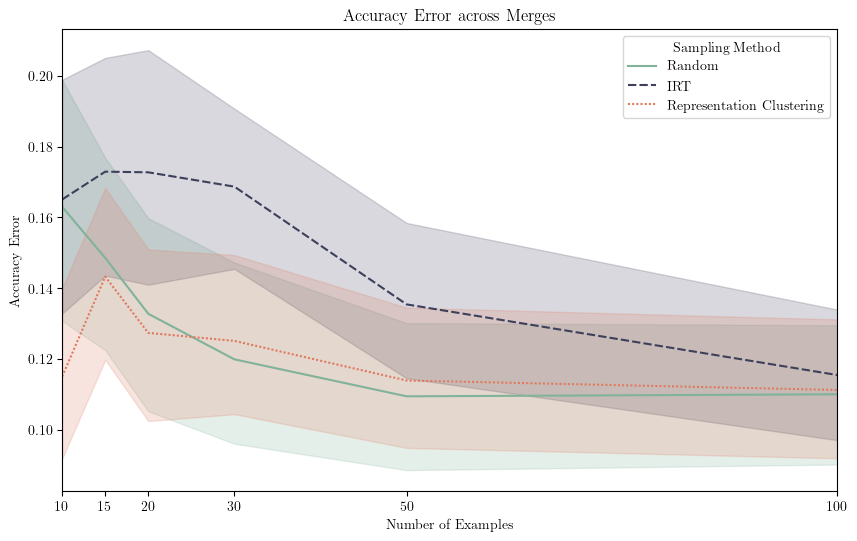

In [8]:
# plot the results for all languages
plt.figure(figsize=(10, 6))
palette = {
    "Random": color_dict["Cambridge blue"],
    "IRT": color_dict["Delft Blue"],
    "Representation Clustering": color_dict["Burnt sienna"],
    # Add other types and their corresponding colors as needed
}

# exclude the total accuracy
axes = sns.lineplot(x="num_examples", y="accuracy_error", 
                    hue="sampling_method", style="sampling_method", 
                    data=df_all, err_style="band", palette=palette)
# set x limit to 0-100
axes.set_xlim([10, 100])

x_ticks = df_all['num_examples'].unique()
axes.set_xticks(x_ticks)

plt.xlabel("Number of Examples")
plt.ylabel("Accuracy Error")
plt.title(f"Accuracy Error across Merges")
plt.legend(title="Sampling Method")

handles, labels = axes.get_legend_handles_labels()  # Get handles and labels from the first subplot

# change labels to be more readable
labels = ["Random", "IRT", "Representation Clustering"]

# Increase legend size by adjusting font size and label spacing
legend = axes.legend(handles, labels, title='Sampling Method')

plt.savefig("figures/accuracy_error_merges.pdf", bbox_inches="tight")


plt.show()


['Random', 'IRT', 'Representation Clustering']


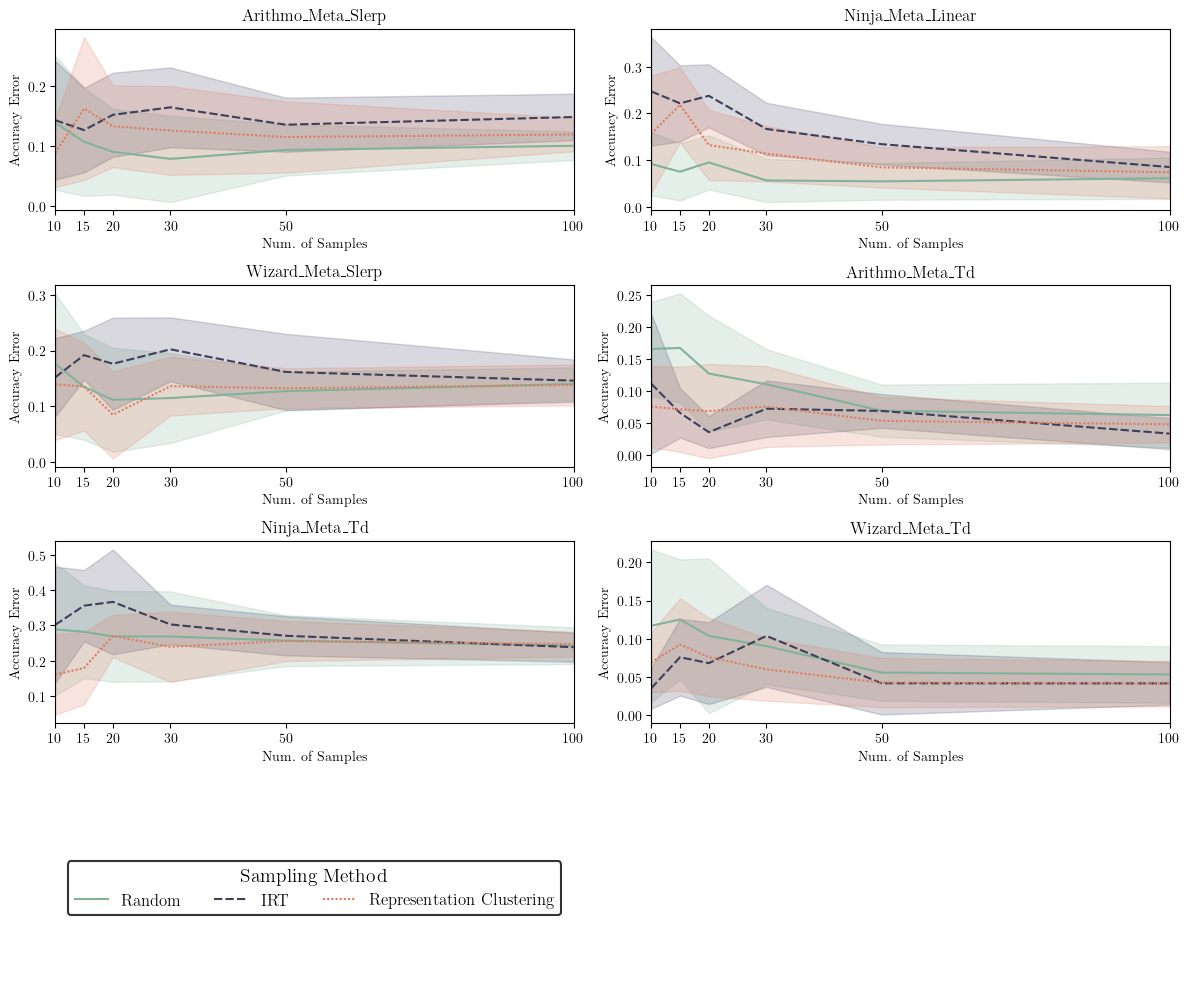

In [7]:
# Set up a 3x2 layout for the subplots
y_merged = [
    'arithmo_meta_slerp',
    'ninja_meta_linear',
    'wizard_meta_slerp',
    'arithmo_meta_td',
    'ninja_meta_td',
    'wizard_meta_td',
]

fig, axes = plt.subplots(4, 2, figsize=(12, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Iterate through the specified merges
for i, merge in enumerate(y_merged):
    no_tot_merge_accuracies = df_all[df_all["merge"] == merge].copy()
    
    # Plot for each merge
    sns.lineplot(
        x="num_examples", y="accuracy_error", hue="sampling_method", data=no_tot_merge_accuracies,
        palette=palette, errorbar="sd", style="sampling_method", ax=axes[i]
    )
    x_ticks = no_tot_merge_accuracies['num_examples'].unique()
    axes[i].xaxis.set_ticks(x_ticks)
    
    # Set title for each subplot
    axes[i].set_title(f"Accuracy vs. Clusters for {merge}")
    axes[i].set_xlim([10, 100])

    # hide legend
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

    # set y title
    axes[i].set_ylabel("Accuracy Error")

    # set x title
    axes[i].set_xlabel("Num. of Samples")

    # set title
    axes[i].set_title(f"{merge.title()}")

# Add the legend to the last subplot
axes[-1].axis('off')  # Turn off the axis for the empty subplot
axes[-2].axis('off')  # Turn off the axis for the empty subplot
handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first subplot

print(labels)
# change labels to be more readable
labels = ["Random", "IRT", "Representation Clustering"]

# Increase legend size by adjusting font size and label spacing
legend = axes[-2].legend(handles, labels, title='Sampling Method', loc='center', ncol=3, fontsize=12, title_fontsize=14)

# Optionally, increase the border and shadow of the legend for better visibility
legend.get_frame().set_alpha(0.8)  # Set transparency
legend.get_frame().set_linewidth(1.5)  # Set border linewidth
legend.get_frame().set_edgecolor('black')  # Set border color
    
# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()